<a href="https://colab.research.google.com/github/washingtontenorio/ferramentas-de-gerenciamento-e-implatacao/blob/main/03_analise_exploratoria_de_dados_old_exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados
 - Conjunto de dados: `tip` (Gorjetas)
 - Cientistas de dados:
   - Madson Dias (madson_dias@atlantico.com.br)
   - Tayná Fiusa (tayna_fiusa@atlantico.com.br)
   - Tiago Nogueira (tiago_nogueira@atlantico.com.br)
---

## Preparação
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados

In [ ]:
import itertools
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown

# sns.set_style("whitegrid")
sns.set_theme(style="whitegrid", palette="colorblind")

palette_dict = {
    'day': 'Set1',   # Exemplo de paleta para 'day'
    'time': 'Dark2', # Exemplo de paleta para 'time'
    'smoker': 'coolwarm', # Paleta para 'smoker'
    'sex': 'Pastel1',   # Paleta para 'sex'
}

In [ ]:
# @title Leitura do conjunto de dados
df = pd.read_csv(
    "https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/tips.csv"
)

In [ ]:
# @title Informações iniciais
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Ultimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Ultimas linhas

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Quantidade de valores únicos

,0
total_bill,229
tip,123
sex,2
smoker,2
day,4
time,2
size,6


---
A partir das informações iniciais, podemos dizer que:
 - O conjunto de dados tem 244 unidades amostrais com 7 variáveis
 - Classificação das variáveis:
    - Quantitativa contínua: `total_bill`, `tip`,
    - Quantitativa discreta: `size`
    - Qualitativa nominal: `sex`, `smoker`
    - Qualitativa ordinal: `day`, `time`
---

## Descrição dos dados

In [ ]:
# @title Dicionário de dados
df_dict = pd.DataFrame([
    {
        "variavel": "total_bill",
        "descricao": "Total pago da conta em dólares.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "tip",
        "descricao": "Valor da gorjeta dada ao garçom em dólares.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "sex",
        "descricao": "Gênero do cliente (Male/Female).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "smoker",
        "descricao": "Indica se o cliente é fumante (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "day",
        "descricao": "Dia da semana da refeição (Thur, Fri, Sat, Sun).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "time",
        "descricao": "Período do dia em que ocorreu a refeição (Lunch/Dinner).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "size",
        "descricao": "Número de pessoas na mesa.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    }
])
df_dict

,variavel,descricao,tipo,subtipo
0,total_bill,Total pago da conta em dólares.,quantitativa,contínua
1,tip,Valor da gorjeta dada ao garçom em dólares.,quantitativa,contínua
2,sex,Gênero do cliente (Male/Female).,qualitativa,nominal
3,smoker,Indica se o cliente é fumante (Yes/No).,qualitativa,nominal
4,day,"Dia da semana da refeição (Thur, Fri, Sat, Sun).",qualitativa,ordinal
5,time,Período do dia em que ocorreu a refeição (Lunc...,qualitativa,ordinal
6,size,Número de pessoas na mesa.,quantitativa,discreta


## Análise univariada

In [ ]:
# @title Resumo estatístico

display(Markdown("### Variáveis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

         sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


### Variáveis quantitativas

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


---
 - `Sábado` é o dia mais movimentado, e o `jantar` é o período mais popular.
 - A maioria dos clientes pagantes são `homens` e `não fumantes`.
 - O gasto médio por conta é `19.79`, com gorjetas médias de `2.99`.
 - A maioria das mesas tem `2` pessoas, e o máximo registrado foi `6`.
---

### Distribuição de variáveis

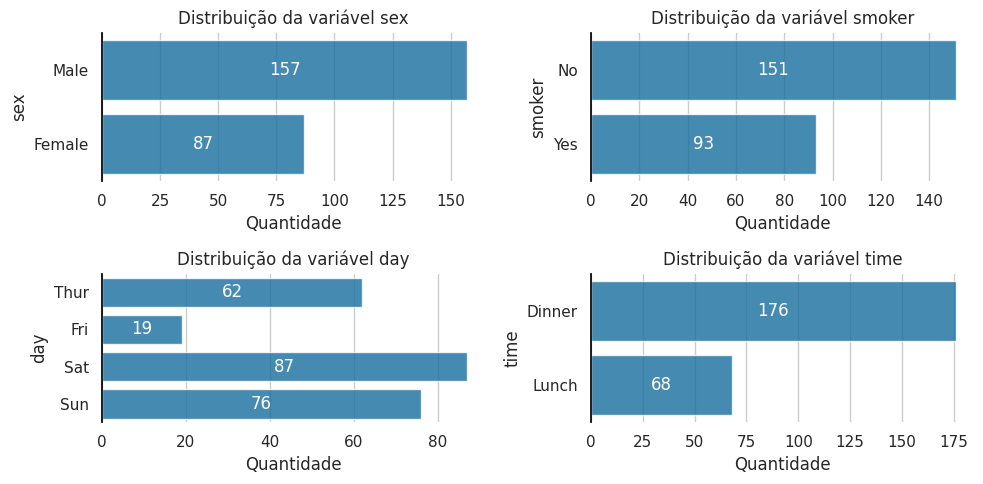

In [ ]:
# @title Variáveis qualitativas
variaveis_qualitativas = df_dict.query("tipo == 'qualitativa'").variavel.to_list()

fig, axes = plt.subplots(figsize=(10, 5), ncols=2, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    if variavel == "day":
        order = ["Thur", "Fri", "Sat", "Sun"]
    else:
        order = df[variavel].value_counts().index
    # Criar a figura
    ax = sns.countplot(df, y=variavel, ax=axes[i], order=order, alpha=.8)
    ax.bar_label(ax.containers[0], fmt="%d", color="white", label_type="center")
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")
plt.tight_layout()
plt.show()

---
 - Mais clientes pagantes são homens (157) do que mulheres (87);
 - A maioria dos clientes não fuma (151 vs. 93);
 - Sábado é o dia mais movimentado (87 clientes), seguido de domingo (76), quinta-feira (62) e Sexta-feira (19).
 - O jantar é muito mais popular que o almoço (176 vs. 68)
---

[]

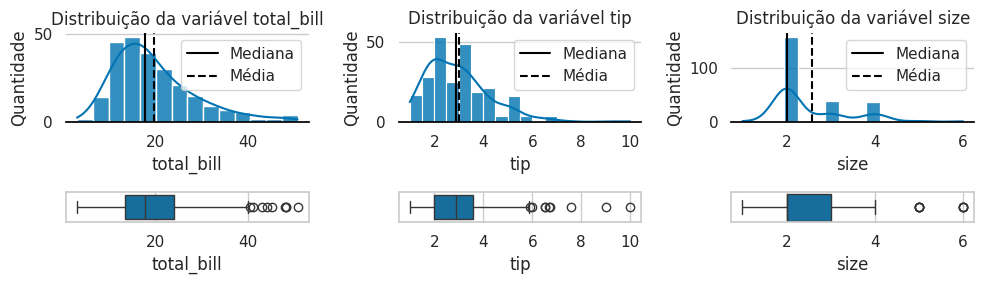

In [ ]:
# @title Variáveis quantitativas
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

fig, axes = plt.subplots(figsize=(10, 3), ncols=3, nrows=2, gridspec_kw={"height_ratios": [3, 1]})

for i, variavel in enumerate(variaveis_quantitativas):
    ax = sns.histplot(data=df, x=variavel, ax=axes[0, i], kde=True, alpha=.8)
    ax.axvline(df[variavel].median(), color="black", label="Mediana")
    ax.axvline(df[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição da variável {variavel}", ylabel="Quantidade")
    ax.legend()
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax = sns.boxplot(data=df, x=variavel, ax=axes[1, i])


plt.tight_layout()
plt.plot()

---
Distribuição da variável `total_bill`
- A maioria das contas está entre 10 e 20 dólares
- Existem contas que passam de 40 dolares, elas são consideradas anomalias
- A distribuição é assimétrica para a direita.

Distribuição da variável `tip`
 - A maioria das gorjetas está entre 2 e 3 dólares
 - Existem gorjetas maiores que 6 dolares, tais gorgertas são consideradas anomalias

Distribuição da variável `size`
 - A moda para esta variável é 2
 - Mesas com tamanhos 5 e 6 são casos raros
---

### Dados faltantes

In [ ]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


---

Não existem dados faltantes

---

## Análise bivariada

### Relação entre variáveis quantitativas

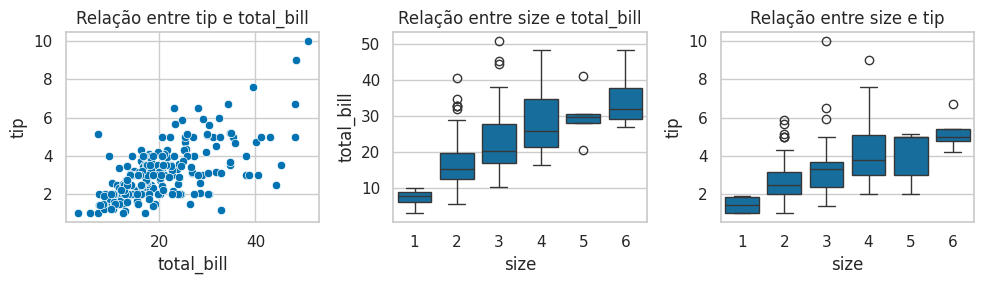

In [ ]:
# @title Comportamento par a par

combinacoes = itertools.combinations(variaveis_quantitativas, 2)

fig, axes = plt.subplots(figsize=(10,3), ncols=3, nrows=1, squeeze=False)
axes = axes.flatten()
for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()
    if len(set(subtipos)) == 1:
        ax = sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i])
    else:
        ax = sns.boxplot(data=df, y=var_1, x=var_2, ax=axes[i])
    ax.set(title=f"Relação entre {var_2} e {var_1}")
plt.tight_layout()
plt.show()

---
 - Existe uma relação crescente entre as variáveis quantitativas
 - A variável `size` varia de maneira crescente em relação as vavariáveis `total_bill` e `tip`.
 - Existem valores discrepantes para a relação (`size` x `total_bill`) quando `size` é `[2, 3, 5]`.
 - Existem valores discrepantes para a relação (`size` x `tip`) quando `size` é `[2, 3, 4, 6]`.
---

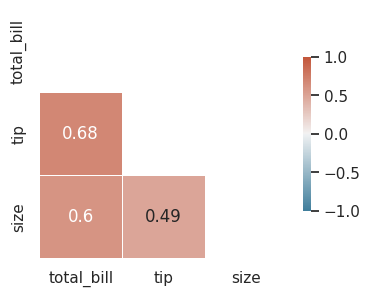

In [ ]:
# @title Correlação
corr = df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True
)
plt.show()

---
 - A relação entre as correlações é `Corr(total_bill,tip) > Corr(total_bill,size) > Corr(size,tip)`
---

### Relação entre variáveis qualitativas

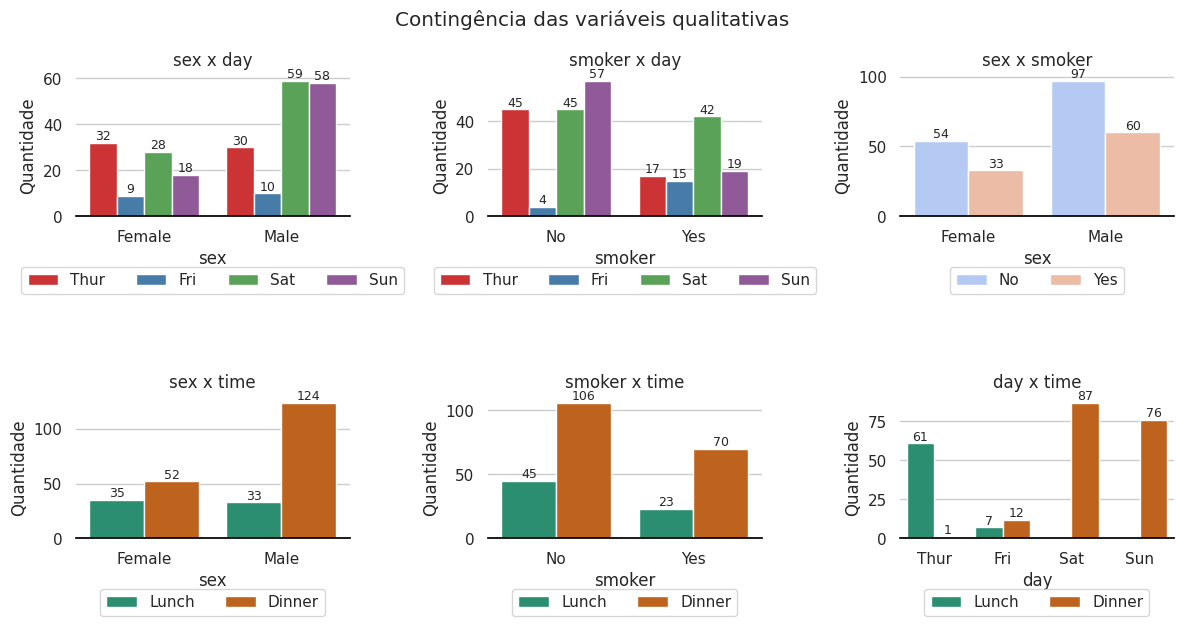

In [ ]:
# @title Contingência
sns.set_style('whitegrid')
combinacoes = sorted(
    itertools.combinations(variaveis_qualitativas, 2),
    key=lambda x: x[1]
)

fig, axes = plt.subplots(figsize=(12,7), ncols=3, nrows=2, squeeze=False)
axes = axes.flatten()
for i, (var_1, var_2) in enumerate(combinacoes):
    # display(Markdown(f"### Relação ({var_1} x {var_2})"))
    # display(pd.crosstab(df[var_1], df[var_2], normalize=True)*100)
    order = None
    hue_order = None
    if var_2 == 'day':
        hue_order = ['Thur', 'Fri', 'Sat', 'Sun']
    elif var_2 == 'time':
        hue_order = ['Lunch', 'Dinner']
    if var_1 == 'day':
        order = ['Thur', 'Fri', 'Sat', 'Sun']
    ax = sns.countplot(df, x=var_1, hue=var_2, ax=axes[i], hue_order=hue_order, order=order, palette=palette_dict[var_2])
    for container in ax.containers:
        ax.bar_label(container, fmt="%d", fontsize=9)#, color="white", label_type="center")
    ax.set(
        title=f"{var_1} x {var_2}",
        ylabel="Quantidade"
    )
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")
    sns.move_legend(
        axes[i], "lower center",
        bbox_to_anchor=(.5, -.6), ncol=4, title=None,
    )
plt.suptitle("Contingência das variáveis qualitativas")
plt.tight_layout()
plt.show()

---
 - Pagantes com `sex=Male` frequentam mais aos sábados (`day=Sat`) e domingos (`day=Sun`), enquanto pagantes com `sex=Female` têm distribuição mais equilibrada.
 - Fumantes (`smoker=Yes`) aparecem mais aos sábados (`day=Sat`), enquanto as sextas-feiras (`day=Fri`) têm menos fumantes (`smoker=No`).
 - Pagantes com `sex=Male` fumam mais que pagantes com `sex=Female`.
 - O jantar (`time=Dinner`) é mais popular que o almoço (`time=Lunch`), principalmente entre os pagantes com `sex=Male`.
 - A maioria dos fumantes (`smoker=Yes`) também prefere jantar (`time=Dinner`).
 - O almoço ocorre principalmente nos fins de semana, enquanto nos dias úteis quase não há registros.
---

### Relação entre variáveis quantitativas e qualitativas

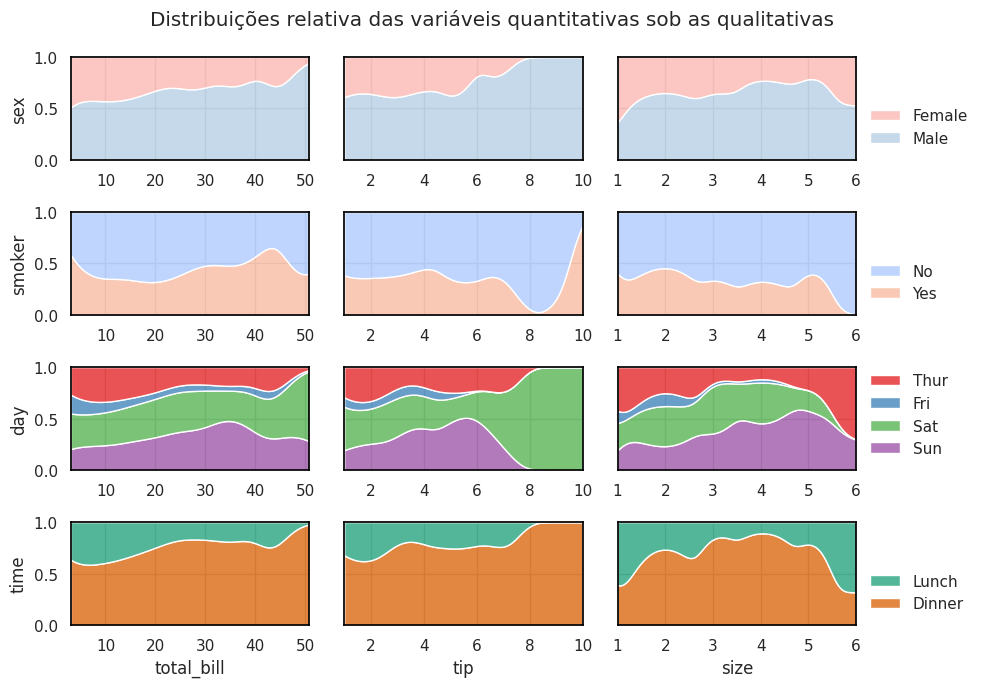

In [ ]:
# @title Distribuição relativa
def kde_plot(df, x, y, axe, i):
    order = None
    palette = palette_dict.get(x)
    if x == 'day':
        order = ['Thur', 'Fri', 'Sat', 'Sun']
    elif x == 'time':
        order = ['Lunch', 'Dinner']
    legend = True if ((i+1)%3==0) else False
    ax = sns.kdeplot(
        data=df, x=y, hue=x, hue_order=order, cut=0,
        multiple="fill", palette=palette, ax=axe, legend=legend
    )
    ax.set(
        # title=f"{y} vs {x}" if i<3 else "",
        ylabel=x,
        xlabel=y if i>8 else "",
    )
    for side in ["left", "top", "right", "bottom"]:
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color("black")
    if ((i+1)%3==0):
        # ax.set(xlabel=y)
        sns.move_legend(
            axes[i], "lower left", ncol=1, title=None,
            bbox_to_anchor=(1, 0), frameon=False
        )

combinacoes = list(itertools.product(variaveis_qualitativas, variaveis_quantitativas))

fig, axes = plt.subplots(figsize=(10,7), ncols=3, nrows=4, squeeze=False, sharey=True)
axes = axes.flatten()
for i, (var_qualitativa, var_quantitativa) in enumerate(combinacoes):
    kde_plot(df, var_qualitativa, var_quantitativa, axes[i], i)
plt.suptitle('Distribuições relativa das variáveis quantitativas sob as qualitativas')
plt.tight_layout()
plt.show()

---

 - Pagantes `Male` parecem ter mais contas altas e gorjetas maiores do que `Female`, o que pode indicar que gastam mais ou frequentam o restaurante em grupos maiores.
 - Não fumantes (`smoker=No`) são mais frequentes na maioria das faixas de valores, mas fumantes (`smoker=Yes`) aparecem proporcionalmente mais em contas (`total_bill`) e gorjetas (`tip`) altas.
 - O sábado (`day=Sat`) e o domingo (`day=Sun`) têm uma proporção maior de contas (`total_bill`) e gorjetas (`tip`) mais altas.
 - O jantar (`time='Dinner`) é predominante nos valores mais altos de (`total_bill`) e gorjetas (`tip`).

---

In [ ]:
# combinacoes = list(itertools.product(variaveis_quantitativas, variaveis_qualitativas))

# fig, axes = plt.subplots(figsize=(10,5), ncols=4, nrows=3, squeeze=False)
# axes = axes.flatten()
# for i, (var_qualitativa, var_quantitativa) in enumerate(combinacoes):
#     order = None
#     if var_quantitativa == 'day':
#         order = ['Thur', 'Fri', 'Sat', 'Sun']
#     elif var_quantitativa == 'time':
#         order = ['Lunch', 'Dinner']
#     ax = sns.barplot(
#         df, x=var_qualitativa, y=var_quantitativa,
#         ax=axes[i], order=order, #estimator="sum", errorbar=None
#     )
#     for container in ax.containers:
#         ax.bar_label(container, fmt="%.1f", color="white", label_type="center", fontsize=9)

#     for side in ["bottom", "top", "right"]:
#         ax.spines[side].set_visible(False)
#     ax.spines["left"].set_color("black")
# plt.suptitle("Relação entre variáveis quantitativas e qualitativas")
# plt.tight_layout()
# plt.show()

## Análise multivariada

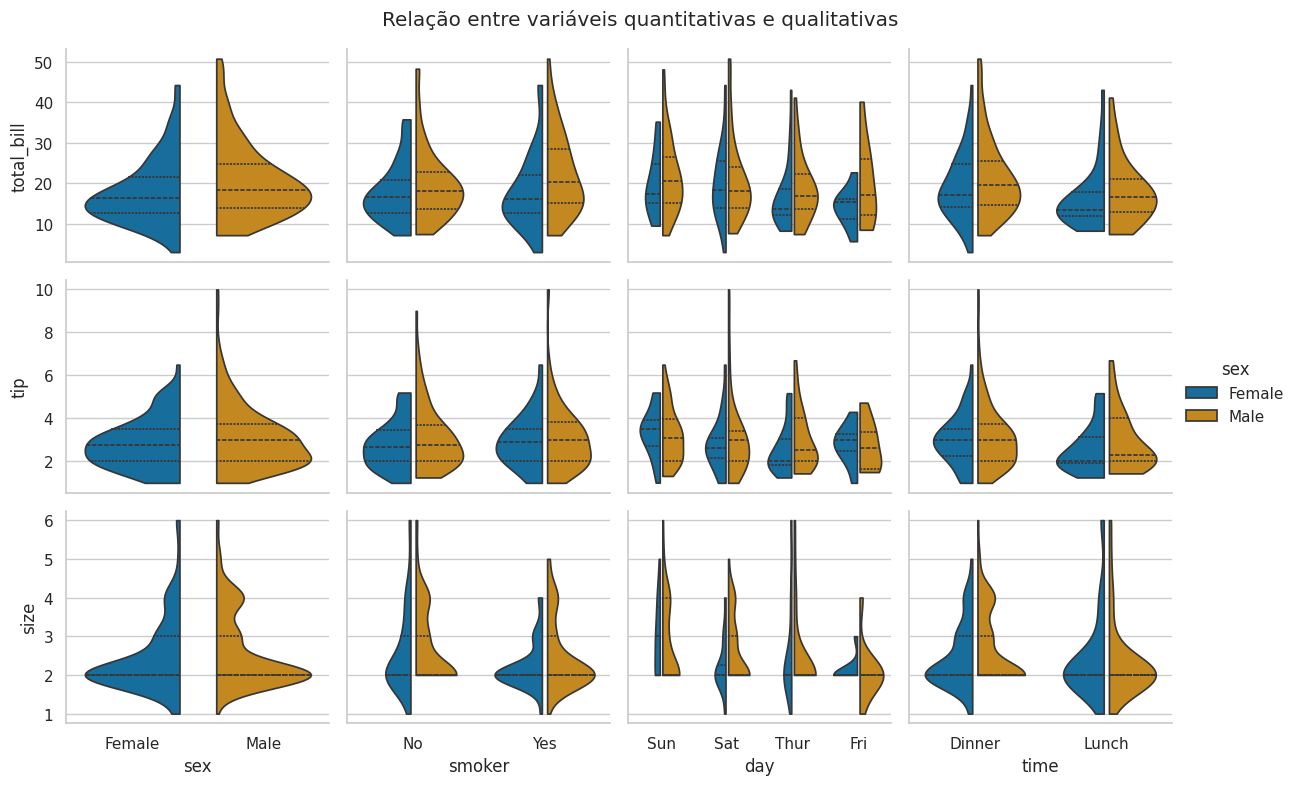

In [ ]:
# @title Distribuição conjunta
g = sns.PairGrid(
    df, y_vars=variaveis_quantitativas, x_vars=variaveis_qualitativas, hue='sex',
    height=3
)
g.fig.set_size_inches(12, 8)
g.map(sns.violinplot, split=True, inner="quart", gap=.1, cut=0, legend=True),

# Ajustando título e layout
plt.suptitle('Relação entre variáveis quantitativas e qualitativas')
plt.tight_layout()  # Reservando espaço para a legenda
g.add_legend()
plt.savefig('algo.pdf')

---
 - Pagantes com `sex=Male` tendem a gastar um pouco mais no total da conta em comparação com pagantes com `sex=Female`, mas as distribuições são relativamente próximas.
 - A distribuição das gorjetas parece variar entre fumantes (`smoker=Yes`) e não fumantes (`smoker=No`).
 - No jantar (`time=Dinner`), os grupos tendem a ser ligeiramente maiores do que no almoço (`time=Lunch`), e homens costumam estar em grupos maiores.
 ---

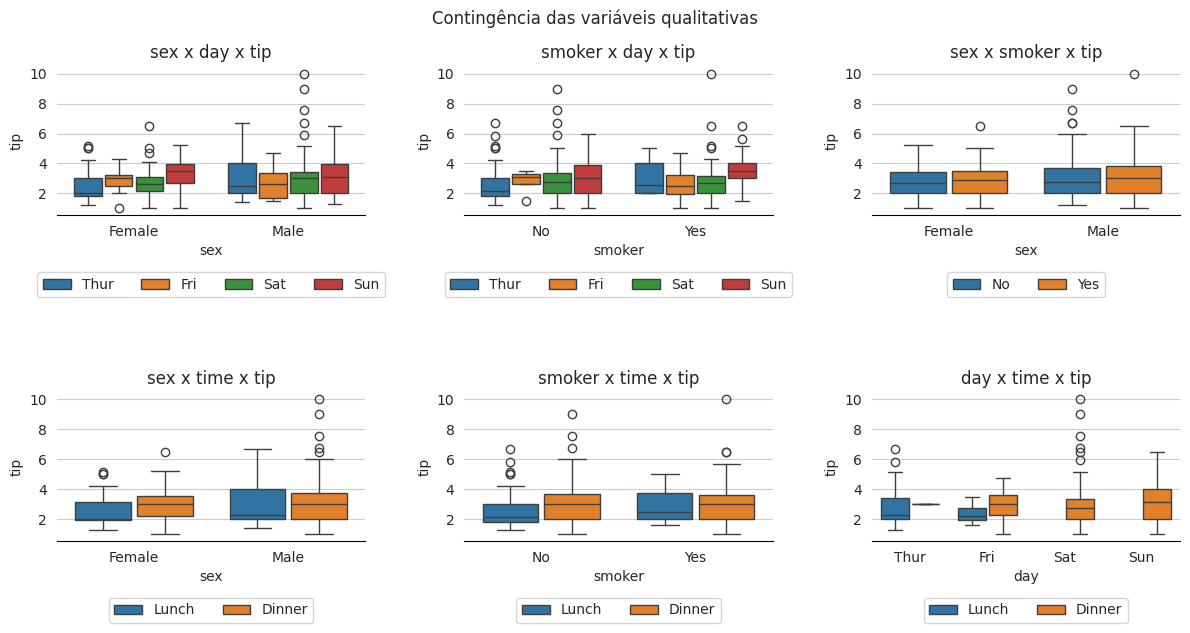

In [ ]:
# @title Contingência
sns.set_style('whitegrid')
combinacoes = sorted(
    itertools.combinations(variaveis_qualitativas, 2),
    key=lambda x: x[1]
)

fig, axes = plt.subplots(figsize=(12,7), ncols=3, nrows=2, squeeze=False)
axes = axes.flatten()
for i, (var_1, var_2) in enumerate(combinacoes):
    # display(Markdown(f"### Relação ({var_1} x {var_2})"))
    # display(pd.crosstab(df[var_1], df[var_2], normalize=True)*100)
    order = None
    hue_order = None
    if var_2 == 'day':
        hue_order = ['Thur', 'Fri', 'Sat', 'Sun']
    elif var_2 == 'time':
        hue_order = ['Lunch', 'Dinner']
    if var_1 == 'day':
        order = ['Thur', 'Fri', 'Sat', 'Sun']
    ax = sns.boxplot(
        df, x=var_1, y='tip', hue=var_2, gap=.1,
        ax=axes[i], hue_order=hue_order, order=order
    )
    ax.set(
        title=f"{var_1} x {var_2} x tip",
        # ylabel="Quantidade"
    )
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["bottom"].set_color("black")
    sns.move_legend(
        axes[i], "lower center",
        bbox_to_anchor=(.5, -.6), ncol=4, title=None,
    )
plt.suptitle("Contingência das variáveis qualitativas")
plt.tight_layout()
plt.show()

---
 - Não há uma diferença clara nos valores de gorjetas entre fumantes e não fumantes, embora fumantes tenham uma leve tendência a gorjetas mais altas nos fins de semana
 - Independentemente do sexo ou se o cliente é fumante ou não, as gorjetas durante o jantar são geralmente maiores do que no almoço.
 - Sábado e domingo são os dias que apresentam a maior dispersão de valores de gorjetas, com mais ocorrências de gorjetas altas, especialmente para homens e durante o jantar.

---

## Sumário de insights e hipóteses
 - Sábado `(day=Sat)` é o dia com mais clientes e contas altas, enquanto o jantar `(time=Dinner)` é mais popular que o almoço `(time=Lunch)`.
 - A maioria dos clientes são homens `(sex=Male)` e não fumantes `(smoker=No)`. Fumantes `(smoker=Yes)` tendem a dar gorjetas mais altas nos fins de semana.
 - A maior parte das contas `(total_bill)` varia de 10 a 20 dólares, com algumas anomalias acima de 40 dólares. Gorjetas (`tip`) estão entre 2 e 3 dólares, e a maioria das mesas (`size`) tem 2 pessoas.
 - Há uma relação crescente entre `size`, `total_bill` e `tip`, com discrepâncias em algumas combinações de `size` e `total_bill`/`tip`.
 - Homens `(sex=Male)` gastam mais no total da conta `(total_bill)` e dão gorjetas (`tip`) maiores. Fumantes `(smoker=Yes)` são mais frequentes em contas altas, especialmente no jantar `(time=Dinner)`.